<h1 style="text-align: center; font-weight: bold;">Data Sciense Course - Spring 1403</h1>
<h1 style="text-align: center; font-weight: bold;">Project Phase2 - Introduction to Data Science </h1>
<h1 style="text-align: center;">Mohammadreza Mohammadhashemi : 810100206</h1>
<h1 style="text-align: center;">Soheil Hajian Manesh : 810100119</h1>
<h1 style="text-align: center;">Mahdi Ebrahimi Soltani : 810100241</h1>

# Problem Description
In this phase of our project, we training machine learning models and evaluate them to predict the target variables.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from tabulate import tabulate
from colorama import Fore
import tensorflow as tf
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier,IsolationForest
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.impute import KNNImputer , SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

c:\Python311\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [4]:
df = pd.read_csv('EDA_df.csv')

# Part 1 & 2: Preprocessing and Feature Engineering Selection

for preprocessing part, we do most of data cleaning in previous part but still something left for this part.       
we first handling missing values for each column.For some columns that have very low percent missing, only drop rows with missing value.For other columns fill missing value using Random Forest Classifire model.      
we also detect and drop outliers using Issolation Forest Model and encode categorical columns using LabelEncoder.

In [5]:
def print_null_values(df):
    null_counts = df.isnull().sum()
    total_rows = len(df)
    null_percentages = (null_counts / total_rows) * 100

    result_df = pd.DataFrame({
        'Column Name': null_counts.index,
        'Null Count': null_counts,
        'Null Percentage': null_percentages
    })

    colored_rows = []
    for i, (_, row) in enumerate(result_df.iterrows()):
        if row['Null Count'] > 0:
            color = Fore.RED
        else:
            color = Fore.WHITE if i % 2 == 0 else Fore.LIGHTWHITE_EX
        colored_row = [
            f"{color}{row['Column Name']}",
            f"{color}{row['Null Count']}",
            f"{color}{row['Null Percentage']:.2f}%",
        ]
        colored_rows.append(colored_row)

    headers = [Fore.CYAN + "Column Name", Fore.CYAN + "Null Count", Fore.CYAN + "Null Percentage"]
    print(tabulate(colored_rows, headers=headers, tablefmt='fancy_grid', numalign='right'))

In [6]:
print_null_values(df)

╒══════════════════════╤══════════════╤═══════════════════╕
│ Column Name          │   Null Count │ Null Percentage   │
╞══════════════════════╪══════════════╪═══════════════════╡
│ Category             │            0 │ 0.00%             │
├──────────────────────┼──────────────┼───────────────────┤
│ Field                │            0 │ 0.00%             │
├──────────────────────┼──────────────┼───────────────────┤
│ Seller Level         │           36 │ 0.40%             │
├──────────────────────┼──────────────┼───────────────────┤
│ Seller In Same Level │            0 │ 0.00%             │
├──────────────────────┼──────────────┼───────────────────┤
│ Basic Price          │            0 │ 0.00%             │
├──────────────────────┼──────────────┼───────────────────┤
│ Standard Price       │            0 │ 0.00%             │
├──────────────────────┼──────────────┼───────────────────┤
│ Premium Price        │            0 │ 0.00%             │
├──────────────────────┼──────────────┼─

In [7]:
df.dropna(subset=['Country'], inplace=True)
print_null_values(df)

╒══════════════════════╤══════════════╤═══════════════════╕
│ Column Name          │   Null Count │ Null Percentage   │
╞══════════════════════╪══════════════╪═══════════════════╡
│ Category             │            0 │ 0.00%             │
├──────────────────────┼──────────────┼───────────────────┤
│ Field                │            0 │ 0.00%             │
├──────────────────────┼──────────────┼───────────────────┤
│ Seller Level         │           36 │ 0.40%             │
├──────────────────────┼──────────────┼───────────────────┤
│ Seller In Same Level │            0 │ 0.00%             │
├──────────────────────┼──────────────┼───────────────────┤
│ Basic Price          │            0 │ 0.00%             │
├──────────────────────┼──────────────┼───────────────────┤
│ Standard Price       │            0 │ 0.00%             │
├──────────────────────┼──────────────┼───────────────────┤
│ Premium Price        │            0 │ 0.00%             │
├──────────────────────┼──────────────┼─

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, 0 to 9000
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Category              9000 non-null   object 
 1   Field                 9000 non-null   object 
 2   Seller Level          8964 non-null   float64
 3   Seller In Same Level  9000 non-null   int64  
 4   Basic Price           9000 non-null   float64
 5   Standard Price        9000 non-null   float64
 6   Premium Price         9000 non-null   float64
 7   Basic Delivery        9000 non-null   int64  
 8   Standard Delivery     9000 non-null   int64  
 9   Premium Delivery      9000 non-null   int64  
 10  Basic Revision        9000 non-null   int64  
 11  Standard Revision     9000 non-null   int64  
 12  Premium Revision      9000 non-null   int64  
 13  Rating                8784 non-null   float64
 14  Rating Count          9000 non-null   float64
 15  Country               9000

In [9]:
def encode_and_save_mappings(df, file_name='column_mappings.txt'):

    df_encoded = df.copy()
    mappings = []

    with open(file_name, 'w') as f:
        for column in df_encoded.select_dtypes(include=['object', 'category']).columns:
            le = LabelEncoder()

            non_null_values = df_encoded[column].dropna()
            le.fit(non_null_values)

            df_encoded[column] = df_encoded[column].apply(lambda x: le.transform([x])[0] if pd.notnull(x) else x)

            mapping = {original: encoded for original, encoded in zip(le.classes_, le.transform(le.classes_))}
            mappings.append({column: mapping})

            f.write(f"Column: {column}\n")
            for original, encoded in mapping.items():
                f.write(f"{original} -> {encoded}\n")
            f.write("\n")

    for mapping in mappings:
        for column, mapping_values in mapping.items():
            print(f"Column: {column}")
            for original, encoded in mapping_values.items():
                print(f"{original} -> {encoded}")
            print()

    return df_encoded

In [10]:
df['Member Since'] = pd.to_datetime(df['Member Since'])
df['Member Since'] = (datetime.now() - df['Member Since']).dt.days

In [11]:
languages = ['Arabic' , 'Bengali', 'Chinese', 'Dutch', 'English', 'French', 'German', 'Hindi', 'Indonesian', 'Italian', 'Portuguese', \
           'Punjabi', 'Russian', 'Spanish', 'Turkish', 'Ukrainian', 'Urdu']

In [12]:
df['Spoken Languages Count'] = df[languages].sum(axis=1)

In [13]:
df_labeled = encode_and_save_mappings(df)

Column: Category
Business -> 0
Data -> 1
Digital Marketing -> 2
Graphics & Design -> 3
Lifestyle -> 4
Music & Audio -> 5
Photography -> 6
Programming & Tech -> 7
Video & Animation -> 8
Writing & Translation -> 9

Column: Field
3d-product-animation -> 0
animated-explainer-videos -> 1
articles-blogposts -> 2
book-editing -> 3
business-plans -> 4
chatbots -> 5
data-analactics -> 6
data-engineering -> 7
data-mining -> 8
data-processing -> 9
data-science -> 10
databases -> 11
digital-illustration -> 12
dj-mixing -> 13
event-photographers -> 14
fashion-design -> 15
financial-consulting-services -> 16
fitness -> 17
food-photographers -> 18
game-art -> 19
game-development -> 20
influencer-marketing -> 21
legal-consulting-services -> 22
life-coaching -> 23
lifestyle-fashion-photographers -> 24
logo-animation-services -> 25
market-research-reports -> 26
mixing-mastering -> 27
mobile-app-services -> 28
modeling-acting -> 29
nft -> 30
online-tutoring -> 31
online-video-marketing -> 32
personal-sty

In [14]:
def impute_with_random_forest(df, columns_to_impute):

    df_imputed = df.copy()
    imputer = SimpleImputer(strategy='most_frequent')

    for target_column in columns_to_impute:
        if df_imputed[target_column].isnull().sum() == 0:
            continue

        df_not_missing = df_imputed.dropna(subset=[target_column])
        df_missing = df_imputed[df_imputed[target_column].isnull()]

        X = df_not_missing.drop(columns=[target_column])
        y = df_not_missing[target_column]

        X_imputed = imputer.fit_transform(X)

        if y.dtype == 'object' or y.dtype.name == 'category':
            model = RandomForestClassifier()
        else:
            model = RandomForestRegressor()

        model.fit(X_imputed, y)

        X_missing = df_missing.drop(columns=[target_column])

        X_missing_imputed = imputer.transform(X_missing)
        y_pred = model.predict(X_missing_imputed)

        df_imputed.loc[df_imputed[target_column].isnull(), target_column] = y_pred

    return df_imputed

In [15]:
def KNN_imputer(df, k=5):
    knn_imputer = KNNImputer(n_neighbors=k)
    imputed_array = knn_imputer.fit_transform(df)
    imputed_df = pd.DataFrame(imputed_array, columns=df.columns)
    return imputed_df

In [16]:
columns_to_impute = ['Rating', 'Member Since', 'Avg Response Time', 'Last Delivery', 'Seller Level']
df_imputed = impute_with_random_forest(df_labeled, columns_to_impute)

In [17]:
print_null_values(df_imputed)

╒════════════════════════╤══════════════╤═══════════════════╕
│ Column Name            │   Null Count │ Null Percentage   │
╞════════════════════════╪══════════════╪═══════════════════╡
│ Category               │            0 │ 0.00%             │
├────────────────────────┼──────────────┼───────────────────┤
│ Field                  │            0 │ 0.00%             │
├────────────────────────┼──────────────┼───────────────────┤
│ Seller Level           │            0 │ 0.00%             │
├────────────────────────┼──────────────┼───────────────────┤
│ Seller In Same Level   │            0 │ 0.00%             │
├────────────────────────┼──────────────┼───────────────────┤
│ Basic Price            │            0 │ 0.00%             │
├────────────────────────┼──────────────┼───────────────────┤
│ Standard Price         │            0 │ 0.00%             │
├────────────────────────┼──────────────┼───────────────────┤
│ Premium Price          │            0 │ 0.00%             │
├───────

In [18]:
df_knn_imputed = KNN_imputer(df_labeled, 10)

In [19]:
print_null_values(df_knn_imputed)

╒════════════════════════╤══════════════╤═══════════════════╕
│ Column Name            │   Null Count │ Null Percentage   │
╞════════════════════════╪══════════════╪═══════════════════╡
│ Category               │            0 │ 0.00%             │
├────────────────────────┼──────────────┼───────────────────┤
│ Field                  │            0 │ 0.00%             │
├────────────────────────┼──────────────┼───────────────────┤
│ Seller Level           │            0 │ 0.00%             │
├────────────────────────┼──────────────┼───────────────────┤
│ Seller In Same Level   │            0 │ 0.00%             │
├────────────────────────┼──────────────┼───────────────────┤
│ Basic Price            │            0 │ 0.00%             │
├────────────────────────┼──────────────┼───────────────────┤
│ Standard Price         │            0 │ 0.00%             │
├────────────────────────┼──────────────┼───────────────────┤
│ Premium Price          │            0 │ 0.00%             │
├───────

`Isolation Forest` is an efficient algorithm for detecting anomalies in data. Developed by Liu, Ting, and Zhou in 2008, it is particularly well-suited for high-dimensional datasets. The key idea behind Isolation Forest is that anomalies are data points that are "few and different." Unlike distance-based or density-based approaches, iForest isolates observations by randomly selecting a feature and then randomly selecting a split value between the minimum and maximum values of the selected feature. This process is repeated to form a tree structure, and the number of splits required to isolate a point is averaged over a forest of such random trees.

Here is a concise summary of the Isolation Forest algorithm:

- Concept: Anomalies are easier to isolate than normal points.
- Method: Builds an ensemble of isolation trees (iTrees) by randomly partitioning data.
- Isolation: Anomalies require fewer splits to be isolated compared to normal points.
- Parameters:
    - n_estimators: Number of trees in the forest.
    - contamination: Proportion of the dataset expected to be anomalies.
    - random_state: Controls the randomness of the forest.

In [20]:
def detect_outliers(df, n_estimators, contamination, random_state):
    print (f'in outlier detection n_estimators is {n_estimators} and the contamination is {contamination}')
    df_copy = df.copy()

    iso = IsolationForest(n_estimators=n_estimators, contamination=contamination ,random_state=random_state)

    outlier_label = iso.fit_predict(df_copy)

    df_copy['outlier'] = outlier_label

    df_outliers = df_copy[df_copy['outlier'] == -1]

    df_copy = df_copy[df_copy['outlier'] == 1]
    df_copy.drop('outlier', axis=1, inplace=True)

    return df_copy, df_outliers

In [21]:
df_no_outlier , _ = detect_outliers(df_imputed, 100, 0.04, 10)
# df_knn_no_outlier , _ = detect_outliers(df_knn_imputed, 100, 0.10, 10)

in outlier detection n_estimators is 100 and the contamination is 0.04


In [22]:
df_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8640 entries, 0 to 9000
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Category                8640 non-null   int32  
 1   Field                   8640 non-null   int32  
 2   Seller Level            8640 non-null   float64
 3   Seller In Same Level    8640 non-null   int64  
 4   Basic Price             8640 non-null   float64
 5   Standard Price          8640 non-null   float64
 6   Premium Price           8640 non-null   float64
 7   Basic Delivery          8640 non-null   int64  
 8   Standard Delivery       8640 non-null   int64  
 9   Premium Delivery        8640 non-null   int64  
 10  Basic Revision          8640 non-null   int64  
 11  Standard Revision       8640 non-null   int64  
 12  Premium Revision        8640 non-null   int64  
 13  Rating                  8640 non-null   float64
 14  Rating Count            8640 non-null   float

In [23]:
def normalize_features(df):
    df_copy = df.copy()

    scaler = StandardScaler()

    df_normalized = pd.DataFrame(scaler.fit_transform(df_copy), columns=df_copy.columns)

    return df_normalized

In [24]:
df_normalized = normalize_features(df_no_outlier)
# df_knn_normalized = normalize_features(df_knn_no_outlier)

## Feature importance

Using mutual information to remove columns that do not give any useful information about the target column to us.

In [25]:
def plot_mutual_infos(df):
    plt.figure(figsize=(16, 6))
    sns.barplot(y="Feature",x="Importance",data=df,order=df["Feature"],)
    plt.title("Feature Importance")
    plt.xlabel("Importance")
    plt.ylabel("Feature Title")
    plt.tight_layout()
    plt.show()

In [26]:
def drop_least_important_features(df, mi_df, num_features_to_drop):
    least_important_features = mi_df.tail(num_features_to_drop)["Feature"]
    df_reduced = df.drop(columns=least_important_features)
    return df_reduced

In [27]:
def calculate_mutual_information(df, target_column):
    X = df.drop([target_column], axis=1)
    y = df[target_column]

    mi = mutual_info_regression(X, y, random_state=42)
    mi_df = pd.DataFrame({"Feature": X.columns, "Importance": mi})
    mi_df.sort_values(by="Importance", ascending=False, inplace=True)

    return mi_df

                   Feature  Importance
5            Premium Price    1.717901
4              Basic Price    1.215040
1                    Field    0.292373
3     Seller In Same Level    0.255199
8         Premium Delivery    0.225326
7        Standard Delivery    0.222318
6           Basic Delivery    0.156148
0                 Category    0.134377
14                 Country    0.072102
19          is_single_plan    0.066991
15            Member Since    0.064196
17           Last Delivery    0.045620
2             Seller Level    0.035449
13            Rating Count    0.032363
12                  Rating    0.028308
11        Premium Revision    0.024932
18          Order in Queue    0.024476
16       Avg Response Time    0.022302
10       Standard Revision    0.017904
21                 Bengali    0.017573
29                 Italian    0.015651
9           Basic Revision    0.013587
28              Indonesian    0.012609
24                 English    0.008851
22                 Chines

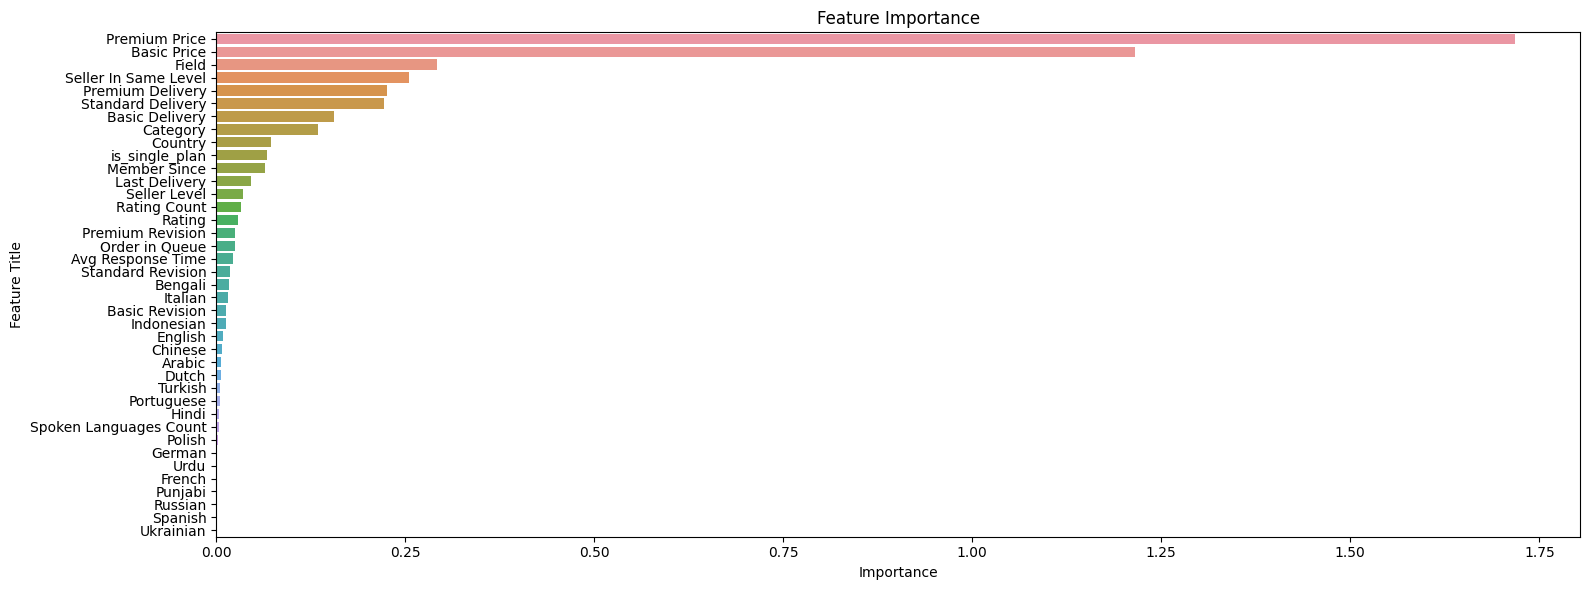

In [28]:
mi_df_1 = calculate_mutual_information(df_normalized, target_column='Standard Price')
print(mi_df_1)
plot_mutual_infos(mi_df_1)

In [29]:
df_final_price = drop_least_important_features(df_normalized, mi_df_1,19)

                   Feature  Importance
3     Seller In Same Level    0.218781
1                    Field    0.198651
17           Last Delivery    0.175907
15            Member Since    0.147629
18          Order in Queue    0.126491
13                  Rating    0.111360
0                 Category    0.106564
2             Seller Level    0.093543
16       Avg Response Time    0.041825
4              Basic Price    0.040743
14                 Country    0.037221
5           Standard Price    0.034443
12        Premium Revision    0.032394
7           Basic Delivery    0.030565
6            Premium Price    0.026549
11       Standard Revision    0.023021
10          Basic Revision    0.018700
8        Standard Delivery    0.016493
9         Premium Delivery    0.015008
38  Spoken Languages Count    0.011670
34                 Spanish    0.010612
29                 Italian    0.009190
22                 Chinese    0.008945
20                  Arabic    0.008433
32                 Punjab

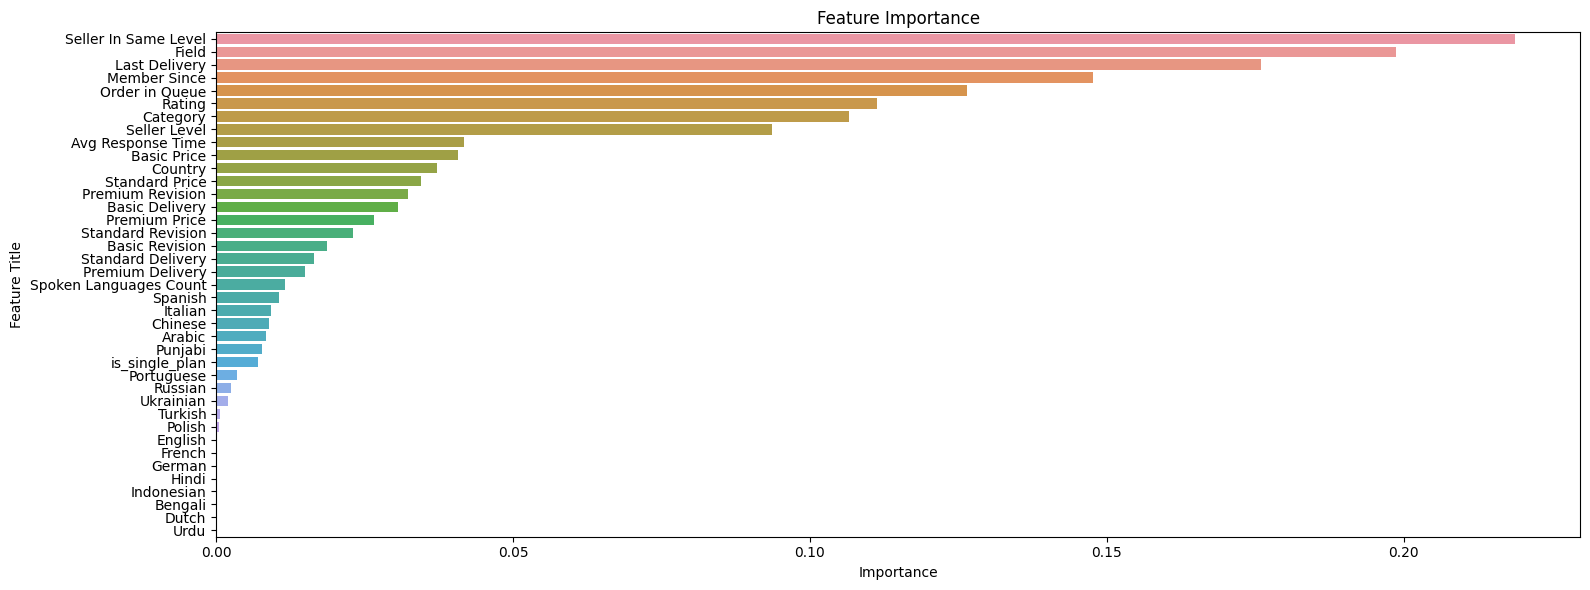

In [30]:
mi_df_2 = calculate_mutual_information(df_normalized, target_column='Rating Count')
print(mi_df_2)
plot_mutual_infos(mi_df_2)

In [31]:
df_final_count = drop_least_important_features(df_normalized, mi_df_2, 13)

In [32]:
df_final_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Category              8640 non-null   float64
 1   Field                 8640 non-null   float64
 2   Seller Level          8640 non-null   float64
 3   Seller In Same Level  8640 non-null   float64
 4   Basic Price           8640 non-null   float64
 5   Standard Price        8640 non-null   float64
 6   Premium Price         8640 non-null   float64
 7   Basic Delivery        8640 non-null   float64
 8   Standard Delivery     8640 non-null   float64
 9   Premium Delivery      8640 non-null   float64
 10  Standard Revision     8640 non-null   float64
 11  Premium Revision      8640 non-null   float64
 12  Rating                8640 non-null   float64
 13  Rating Count          8640 non-null   float64
 14  Country               8640 non-null   float64
 15  Member Since         

In [33]:
df_final_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Category                8640 non-null   float64
 1   Field                   8640 non-null   float64
 2   Seller Level            8640 non-null   float64
 3   Seller In Same Level    8640 non-null   float64
 4   Basic Price             8640 non-null   float64
 5   Standard Price          8640 non-null   float64
 6   Premium Price           8640 non-null   float64
 7   Basic Delivery          8640 non-null   float64
 8   Standard Delivery       8640 non-null   float64
 9   Premium Delivery        8640 non-null   float64
 10  Basic Revision          8640 non-null   float64
 11  Standard Revision       8640 non-null   float64
 12  Premium Revision        8640 non-null   float64
 13  Rating                  8640 non-null   float64
 14  Rating Count            8640 non-null   

In [34]:
# df_imputed['avg_income'] = df_imputed['Standard Price'] * df_imputed['Rating Count']
# df_imputed['avg_work_time'] = df_imputed['Standard Delivery'] * df_imputed['Rating Count']

In [35]:
# df_knn_imputed['avg_income'] = df_knn_imputed['Standard Price'] * df_knn_imputed['Rating Count']
# df_knn_imputed['avg_work_time'] = df_knn_imputed['Standard Delivery'] * df_knn_imputed['Rating Count']

In [36]:
def plot_correlation_heatmap(df, exclude_columns=None):
    numeric_cols = df.select_dtypes(include=['number'])

    if exclude_columns:
        numeric_cols = numeric_cols.drop(columns=exclude_columns)

    corr_matrix = numeric_cols.corr()

    plt.figure(figsize=(24, 16))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Correlation Matrix Heatmap")
    plt.show()

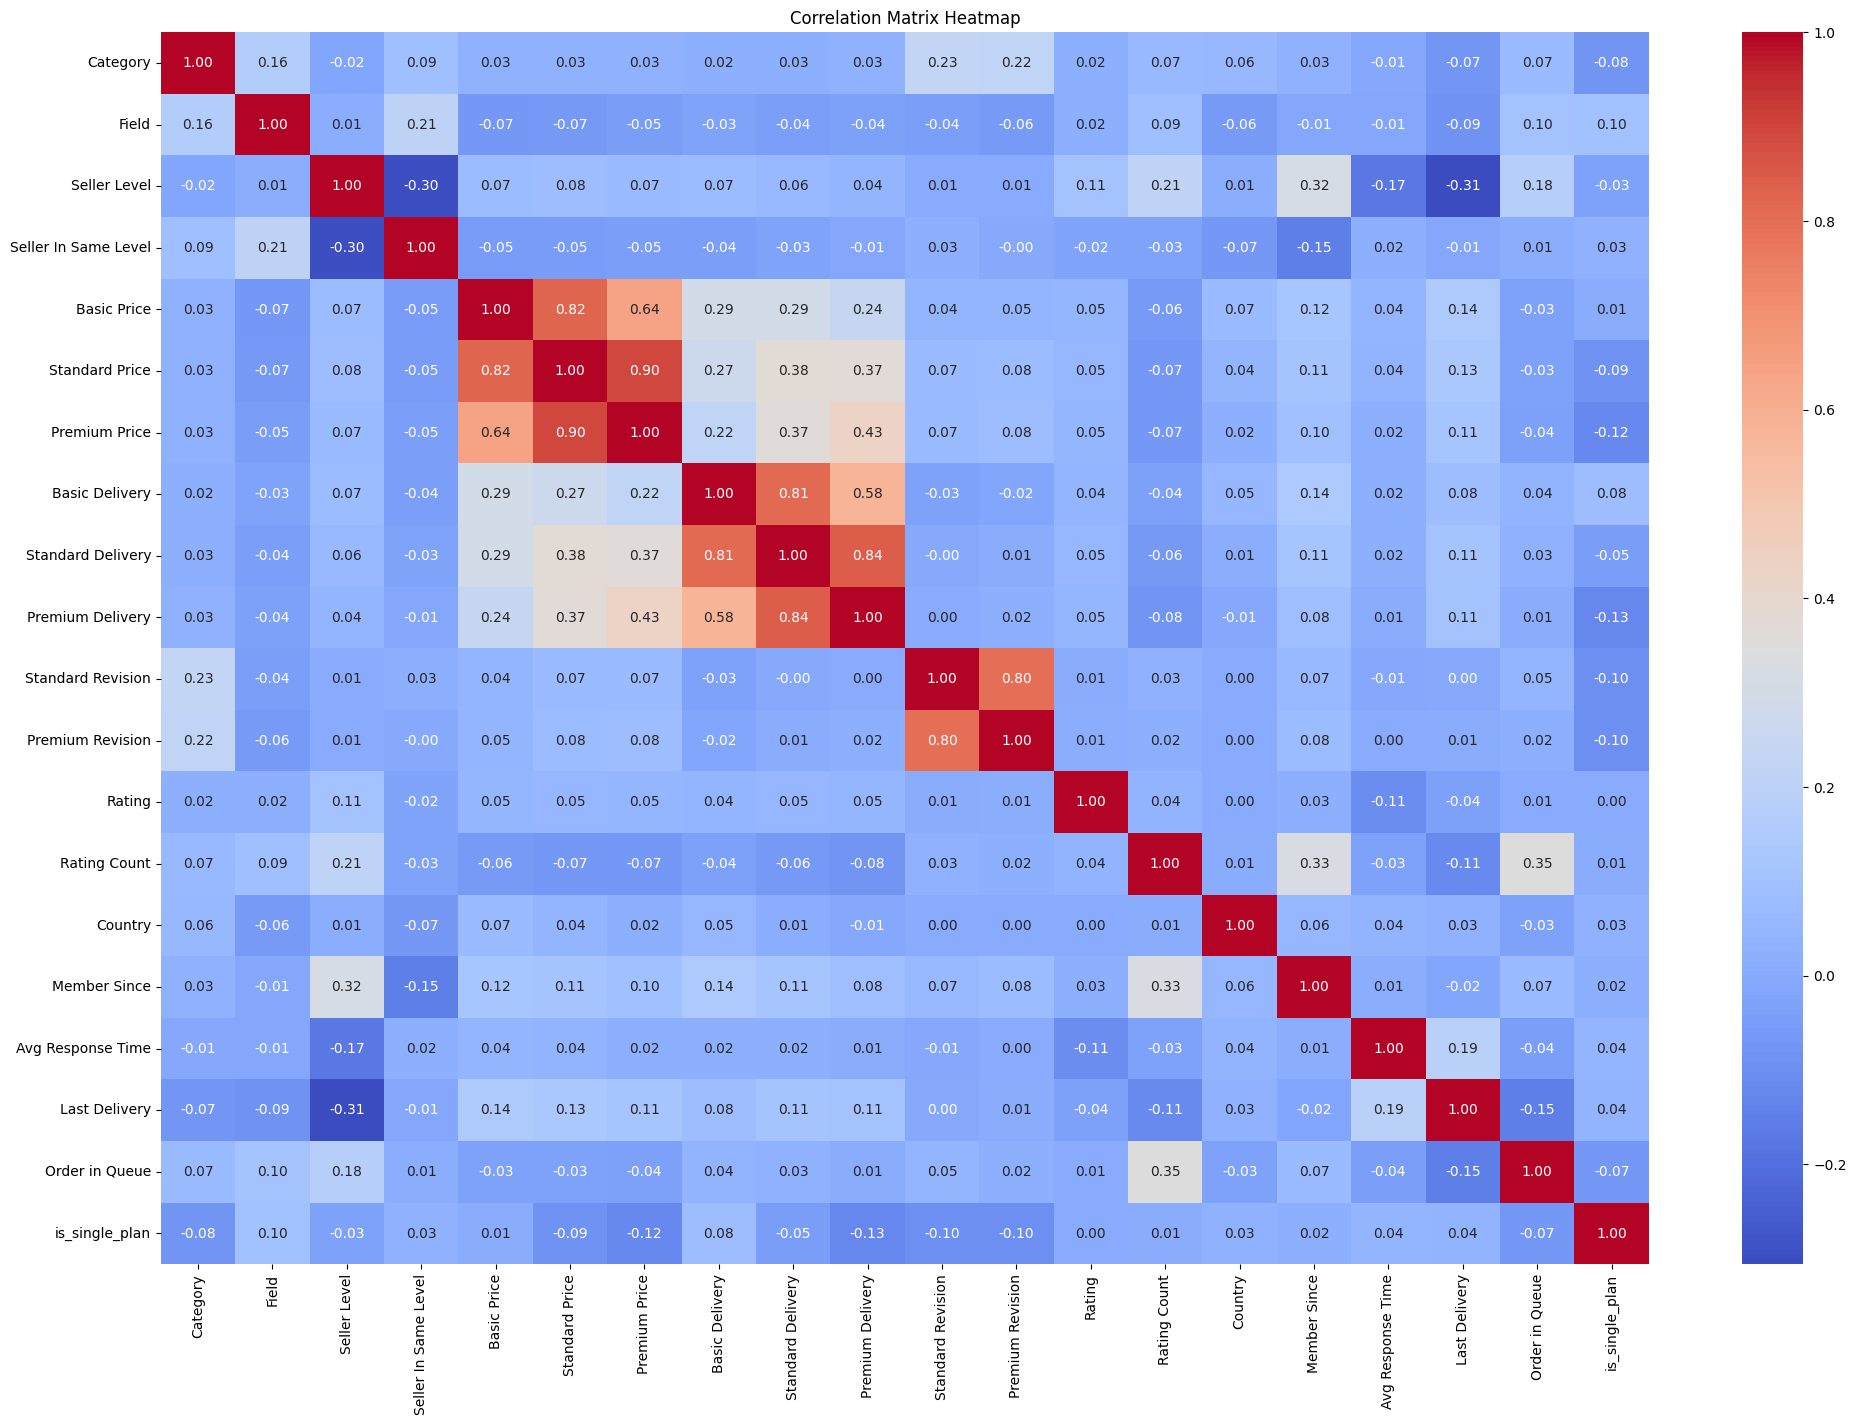

In [38]:
plot_correlation_heatmap(df_final_price, ["Bengali"])

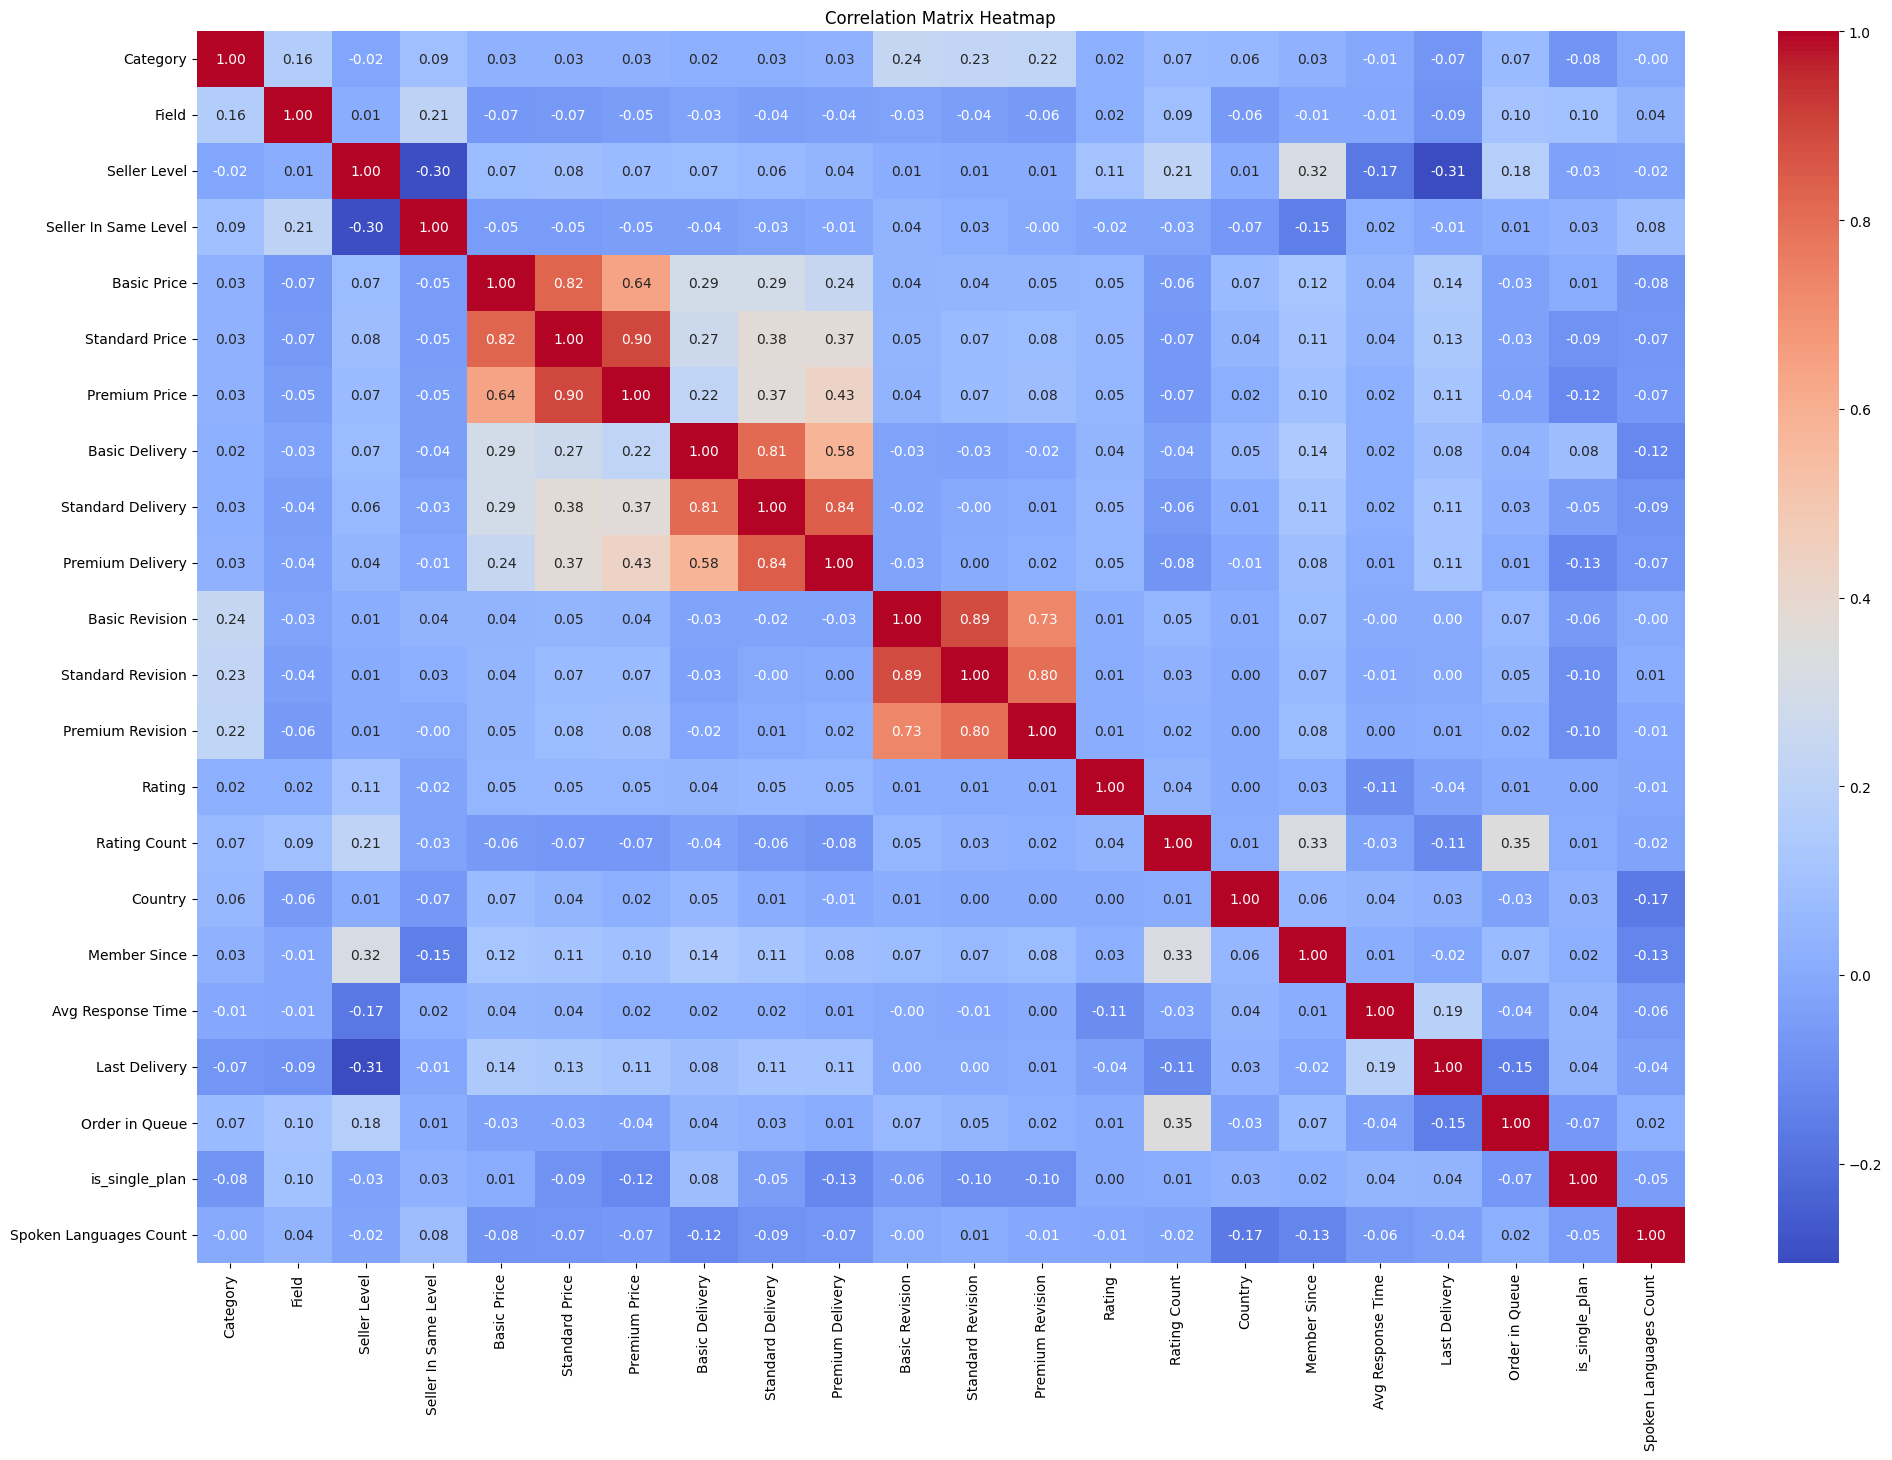

In [39]:
plot_correlation_heatmap(df_final_count, ['Arabic','Chinese','Spanish','Punjabi','Italian'])

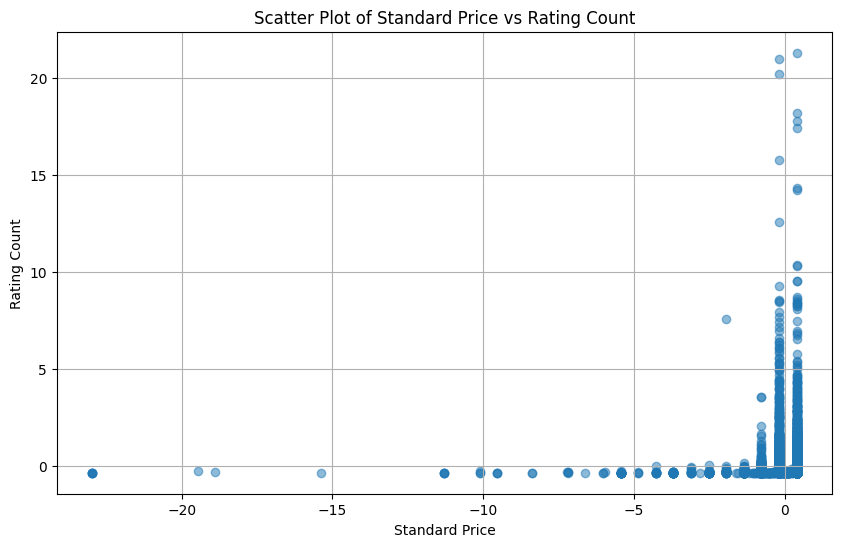

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(df_final_price["Rating"], df_final_price["Rating Count"], alpha=0.5)
plt.xlabel("Standard Price")
plt.ylabel("Rating Count")
plt.title("Scatter Plot of Standard Price vs Rating Count")
plt.grid(True)
plt.show()

# Part 3: Dimensionaly Reduction

In [41]:
def apply_pca(df, variance_ratio, random_state,target_column):
    print(f'in pca the variance ratio is {variance_ratio}')
    df_copy = df.copy()

    target = df_copy[target_column]
    df_copy = df_copy.drop(columns=[target_column])

    pca = PCA(n_components=variance_ratio, random_state=random_state)

    df_pca = pd.DataFrame(pca.fit_transform(df_copy))

    if (variance_ratio < 1):
        print (f'pca dimontions after pca : {df_pca.shape[1]}')
    else:
        print(f'Total explained variance: {sum(pca.explained_variance_ratio_)}')
    df_pca[target_column] = target.values
    return df_pca

In [42]:
print(df_final_price.shape)

(8640, 21)


In [43]:
df_pca_2d_price = apply_pca(df_final_price, 2, 10,"Standard Price")
df_pca_95_price = apply_pca(df_final_price, 0.95, 10, "Standard Price")
# df_knn_pca_2d = apply_pca(df_knn_normalized, 2, 10)
# df_knn_pca_95 = apply_pca(df_knn_normalized, 0.95, 10)

in pca the variance ratio is 2
Total explained variance: 0.2545162408825409
in pca the variance ratio is 0.95
pca dimontions after pca : 16


In [44]:
df_pca_2d_count = apply_pca(df_final_count, 2, 10,"Rating Count")
df_pca_95_count = apply_pca(df_final_count, 0.95, 10,"Rating Count")

in pca the variance ratio is 2
Total explained variance: 0.24569565760870868
in pca the variance ratio is 0.95
pca dimontions after pca : 20


# Part 4: Evaluation metrics

Our task is regression and we use `R2 Score` and `MSE` as evaluataion metrics.     
**Reasons for Choosing R² Score and MSE**     

- R² Score:

    - **Goodness of Fit:** It provides a clear measure of how well the independent variables explain the variability of the dependent variable.
    - **Comparability:** Allows comparison between models by showing the proportion of variance explained by each model.
    - **Interpretability:** It is intuitive and easy to interpret, as it directly relates to the proportion of explained variance.
- MSE:
    - **Error Magnitude:** Directly measures the average magnitude of the errors in the predictions, providing insight into the accuracy of the model.
    - **Penalization of Large Errors:** By squaring the errors, MSE places more weight on larger errors, which can be particularly useful if large errors are particularly undesirable in your project.
    - **Optimization:** Many machine learning algorithms, including linear regression and neural networks, optimize for MSE during training, making it a natural choice for evaluation.

# Part 5 : Model Training

In [45]:
X = df_final_price.drop(columns=['Standard Price'])
y = df_final_price['Standard Price']
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X, y, test_size=0.2, random_state=10)

In [46]:
X = df_final_count.drop(columns=['Rating Count'])
y = df_final_price['Rating Count']
X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(X, y, test_size=0.2, random_state=10)

In [47]:
def plot_training_history(history):
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.title("Training and Validation Loss")
    plt.show()

In [48]:
def evaluate_regression_model(model,X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} R² score: {r2:.4f}")
    
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Standard Price")
    plt.ylabel("Predicted Standard Price")
    plt.title(f"Actual vs Predicted Standard Price - {model_name}")
    plt.show()

## Linear Regression

In [49]:
def train_linear_regression(X_train, y_train):

    lr_model = LinearRegression()

    param_grid = {'fit_intercept': [True, False],}

    grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_lr_model = grid_search.best_estimator_
    print(f'best mse was : {- grid_search.best_score_}')
    print(f"Best hyperparameters: {grid_search.best_params_}")

    return best_lr_model

### Linear Regression for Standard Price Target

best mse was : 0.09156689727226366
Best hyperparameters: {'fit_intercept': False}
Linear Regression R² score: 0.9247


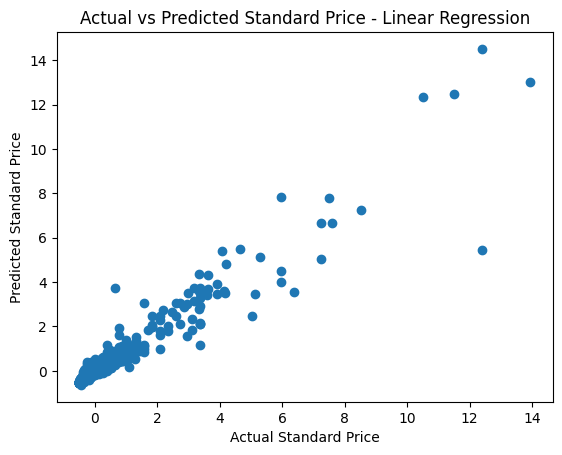

In [50]:
ln_model = train_linear_regression(X_train_price, y_train_price)
evaluate_regression_model(ln_model, X_test_price, y_test_price, "Linear Regression")

### Linear Regression for Rating Count Target

best mse was : 0.7428876693844335
Best hyperparameters: {'fit_intercept': False}
Linear Regression R² score: 0.2163


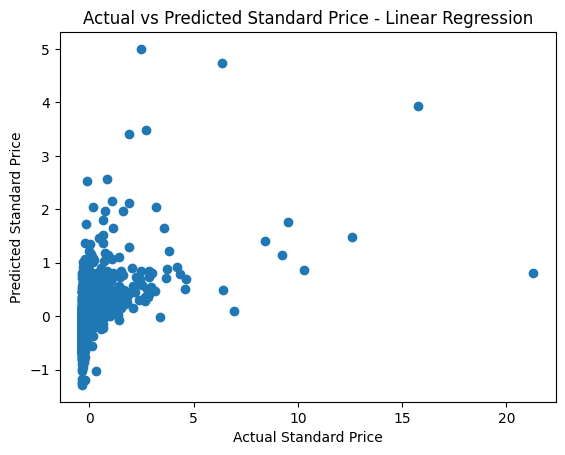

In [51]:
ln_model = train_linear_regression(X_train_count, y_train_count)
evaluate_regression_model(ln_model, X_test_count, y_test_count, "Linear Regression")

## KNN Regression

In [52]:
def train_knn_regression(X_train, y_train):

    knn_regressor = KNeighborsRegressor()

    param_grid = {
        'n_neighbors': [10,11,12,13,14],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }

    grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_knn_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    print(f'Best score: {- grid_search.best_score_:.4f}')
    print(f'Best hyperparameters: {best_params}')

    return best_knn_model

### KNN Regression for Standard Price Target

Best score: 0.1728
Best hyperparameters: {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}
KNN Regressor R² score: 0.8551


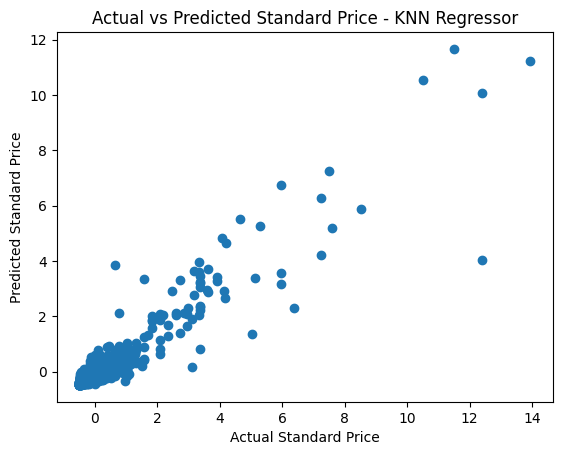

In [53]:
knn_model = train_knn_regression(X_train_price, y_train_price)
evaluate_regression_model(knn_model, X_test_price, y_test_price, "KNN Regressor")

### KNN Regression for Rating Count Target

Best score: 0.7374
Best hyperparameters: {'algorithm': 'ball_tree', 'n_neighbors': 14, 'weights': 'distance'}
KNN Regressor R² score: 0.3110


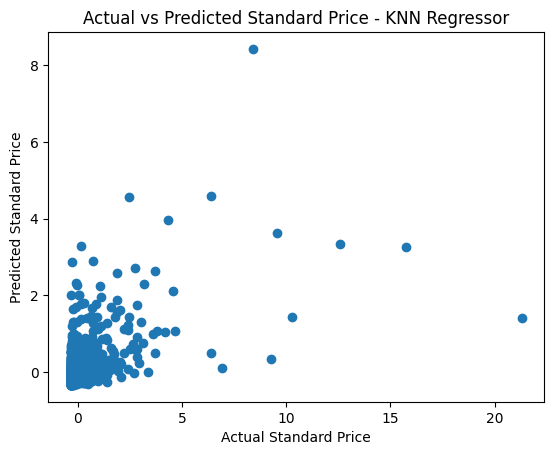

In [54]:
knn_model = train_knn_regression(X_train_count, y_train_count)
evaluate_regression_model(knn_model, X_test_count, y_test_count, "KNN Regressor")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming df is your DataFrame with all the features including 'Rating Count'
# Extract features (X) and target (y)
X = df.drop(columns=["Rating Count"])  # Features
y = df["Rating Count"]  # Target

# Identify categorical columns
categorical_columns = X.select_dtypes(include=["object"]).columns

# One-hot encode categorical variables
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(), categorical_columns)],
    remainder="passthrough",
)

X_encoded = preprocessor.fit_transform(X)

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Fit polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on test set
y_pred = model.predict(X_test_poly)

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f"R² score: {r2:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Rating Count")
plt.ylabel("Predicted Rating Count")
plt.title("Actual vs Predicted Rating Count (Polynomial Regression)")
plt.grid(True)
plt.show()

ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.

In [ ]:
# from sklearn.svm import SVR
# def train_svr_regression(X_train, y_train):
#     svr_regressor = SVR()

#     param_grid = {
#         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#         'C': [0.1, 1, 10, 100],
#         'gamma': ['scale', 'auto'],
#         'degree': [2, 3, 4]  
#     }

#     grid_search = GridSearchCV(svr_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
#     grid_search.fit(X_train, y_train)

#     best_svr_model = grid_search.best_estimator_
#     best_params = grid_search.best_params_

#     print(f'Best score: {- grid_search.best_score_:.4f}')
#     print(f'Best hyperparameters: {best_params}')

#     return best_svr_model

In [ ]:
# svr_model = train_svr_regression(X_train_count, y_train_count)
# evaluate_regression_model(svr_model, X_test_count, y_test_count, "SVR")

## Neural Network

Adam is a popular optimizer for neural networks because:

1. Adaptive Learning Rates: It computes individual learning rates for different parameters.
2. Momentum: It incorporates the moving average of the gradient to speed up convergence.
3. Efficiency: It works well with large datasets and high-dimensional spaces.
4. Little Memory Requirements: It's computationally efficient with a small memory footprint.

Adam combines the benefits of two other extensions of stochastic gradient descent, AdaGrad and RMSProp, making it effective for problems with noisy or sparse gradients.

As we mentioned earlier we choose `MSE` for loss function as evaluation metric because our task is regression and mse fits better to it.

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def train_and_plot(X_train, y_train, X_val=None, y_val=None, epochs=50, learning_rate=0.001):
    number_of_features = X_train.shape[1]

    model = Sequential()

    model.add(Dense(units=128, activation='relu', input_dim=number_of_features))

    model.add(Dense(units=256, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(units=256, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Dense(units=1))

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')

    model.summary()

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=32,
                        validation_data=(X_val, y_val) if X_val is not None and y_val is not None else None)
    
    y_val_pred = model.predict(X_val)
    val_mse = mean_squared_error(y_val, y_val_pred)
    r2 = r2_score(y_val, y_val_pred)
    print(f"Validation MSE: {val_mse:.4f}")
    print(f"Validation R2: {r2:.4f}")

    plot_training_history(history)


    return model

### Neural Network for Standard Price Target

In [60]:
trained_model = train_and_evaluate_nn(X_train_price, y_train_price, X_test_price, y_test_price)

Epoch 1/200


c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2181 - val_loss: 0.1140
Epoch 2/200
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1041 - val_loss: 0.0946
Epoch 3/200
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0686 - val_loss: 0.1651
Epoch 4/200
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0731 - val_loss: 0.1035
Epoch 5/200
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0759 - val_loss: 0.1006
Epoch 6/200
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 0.0652 - val_loss: 0.1648
Epoch 7/200
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - loss: 0.0820 - val_loss: 0.1058
Epoch 8/200
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - loss: 0.0619 - val_loss: 0.1003
Epoch 9/200
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - loss: 0.0590 - val_loss: 0.1112
Epoch 10/200
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0624 - val_loss: 0.1145
Epoch 11/200
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 0.0541 - val_loss: 0.0999
Epoch 12/200
216/216 ━━━━━━━━━━━━━━━━━━━━ 0

### Neural Network for Rating Count Target

In [58]:
trained_model = train_and_evaluate_nn(X_train_count, y_train_count, X_test_count, y_test_count)

Epoch 1/200


c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1384 - val_loss: 0.1381
Epoch 2/200
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1259 - val_loss: 0.1346
Epoch 3/200
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1421 - val_loss: 0.1320
Epoch 4/200
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1324 - val_loss: 0.1322
Epoch 5/200
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1137 - val_loss: 0.1281
Epoch 6/200
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1158 - val_loss: 0.1272
Epoch 7/200
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1022 - val_loss: 0.1255
Epoch 8/200
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1073 - val_loss: 0.1247
Epoch 9/200
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1230 - val_loss: 0.1311
Epoch 10/200
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0982 - val_loss: 0.1287
Epoch 11/200
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1023 - val_loss: 0.1251
Epoch 12/200
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

# Part 6: Feature Analysis

### For Rating Count Target

In [61]:
X = df_pca_2d_count.drop(columns=['Rating Count'])
y = df_pca_2d_count['Rating Count']
X_train_pca_2d_count, X_test_pca_2d_count, y_train_pca_2d_count, y_test_pca_2d_count = train_test_split(X, y, test_size=0.2, random_state=10)

In [62]:
X = df_pca_95_count.drop(columns=['Rating Count'])
y = df_pca_95_count['Rating Count']
X_train_pca_95_count, X_test_pca_95_count, y_train_pca_95_count, y_test_pca_95_count = train_test_split(X, y, test_size=0.2, random_state=10)

Best score: 1.0205
Best hyperparameters: {'algorithm': 'brute', 'n_neighbors': 14, 'weights': 'uniform'}
KNN Regressor R² score: -0.0108


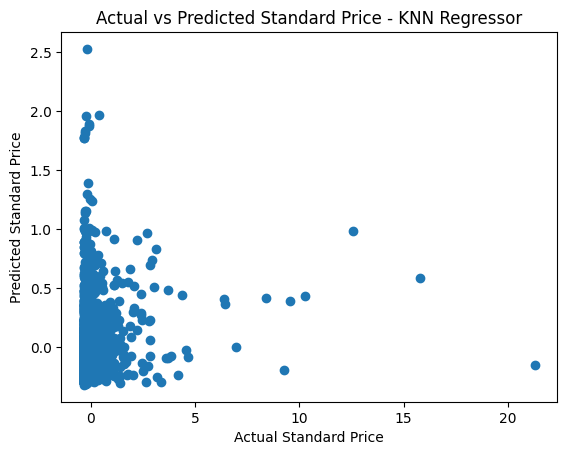

In [63]:
knn_model = train_knn_regression(X_train_pca_2d_count, y_train_pca_2d_count)
evaluate_regression_model(knn_model, X_test_pca_2d_count, y_test_pca_2d_count, "KNN Regressor")

best mse was : 0.741589338709493
Best hyperparameters: {'fit_intercept': False}
KNN Regressor R² score: 0.2179


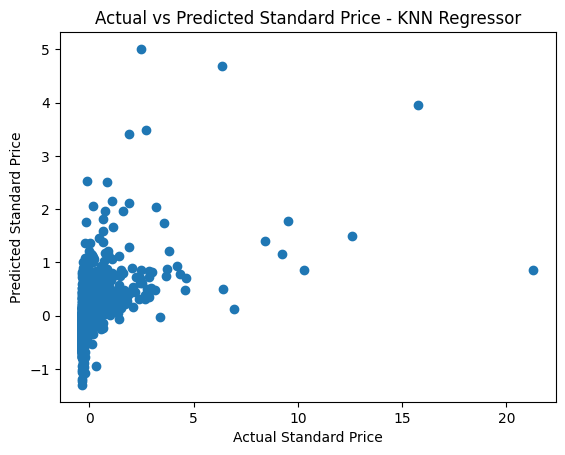

In [64]:
knn_model = train_linear_regression(X_train_pca_95_count, y_train_pca_95_count)
evaluate_regression_model(knn_model, X_test_pca_95_count, y_test_pca_95_count, "KNN Regressor")

### For Standard Price

In [65]:
X = df_pca_2d_price.drop(columns=['Standard Price'])
y = df_pca_2d_price['Standard Price']
X_train_pca_2d_price, X_test_pca_2d_price, y_train_pca_2d_price, y_test_pca_2d_price = train_test_split(X, y, test_size=0.2, random_state=10)

In [66]:
X = df_pca_95_price.drop(columns=['Standard Price'])
y = df_pca_95_price['Standard Price']
X_train_pca_95_price, X_test_pca_95_price, y_train_pca_95_price, y_test_pca_95_price = train_test_split(X, y, test_size=0.2, random_state=10)

best mse was : 0.5358728652589717
Best hyperparameters: {'fit_intercept': False}
Linear Regression R² score: 0.4485


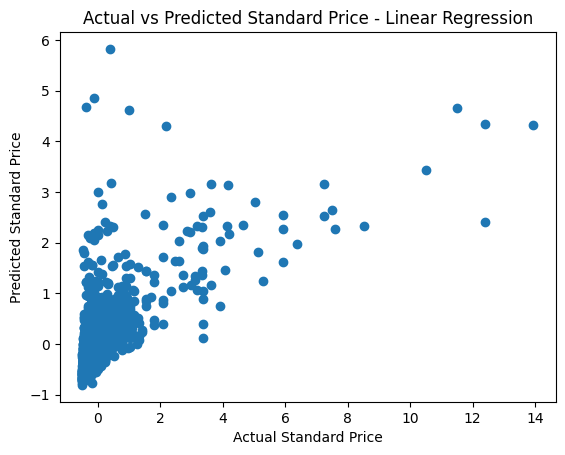

In [67]:
rl_model = train_linear_regression(X_train_pca_2d_price, y_train_pca_2d_price)
evaluate_regression_model(rl_model, X_test_pca_2d_price, y_test_pca_2d_price,"Linear Regression")

best mse was : 0.09719784015351887
Best hyperparameters: {'fit_intercept': True}
Linear Regression R² score: 0.9096


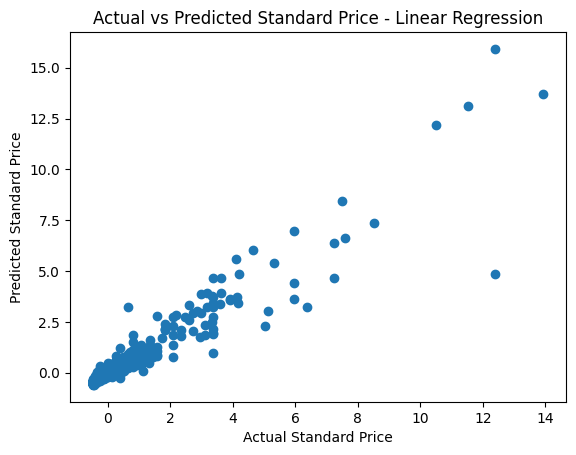

In [68]:
rl_model = train_linear_regression(X_train_pca_95_price, y_train_pca_95_price)
evaluate_regression_model(rl_model, X_test_pca_95_price, y_test_pca_95_price,"Linear Regression")